Preprossin Data

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import set_config

In [2]:
df = pd.read_csv('/home/mohammad/code/Reem24Alamri/hospitai/raw_data/HDHI Admission data.csv')

df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(15757, 56)

<AxesSubplot:ylabel='DURATION OF STAY'>

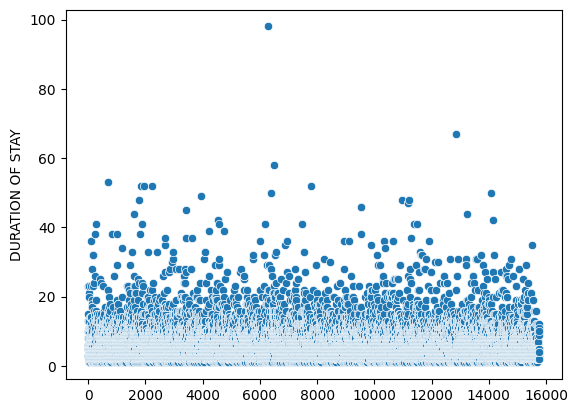

In [4]:
sns.scatterplot(data=df['DURATION OF STAY'])

<AxesSubplot:xlabel='DURATION OF STAY', ylabel='Count'>

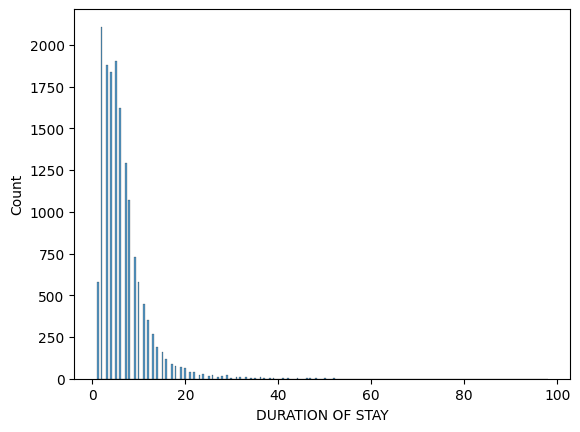

In [5]:
sns.histplot(data=df['DURATION OF STAY'])

In [6]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [7]:
(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

BNP                                53.569842
EF                                  9.551311
GLUCOSE                             5.476931
TLC                                 1.815066
PLATELETS                           1.808720
HB                                  1.599289
CREATININE                          1.567557
UREA                                1.529479
SNO                                 0.000000
STEMI                               0.000000
HEART FAILURE                       0.000000
HFREF                               0.000000
HFNEF                               0.000000
VALVULAR                            0.000000
CHB                                 0.000000
SSS                                 0.000000
AKI                                 0.000000
CVA INFRACT                         0.000000
CVA BLEED                           0.000000
AF                                  0.000000
VT                                  0.000000
PSVT                                0.000000
CONGENITAL

In [8]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [9]:
df.drop(columns=[
    'SNO',
    'MRD No.',
    'D.O.A',
    'D.O.D',
    'BNP',
    'duration of intensive unit stay'
    ], inplace=True)
df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,Apr-17,3,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,Apr-17,5,DISCHARGE,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,53,M,U,E,Apr-17,3,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,67,F,U,E,Apr-17,8,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,F,U,E,Apr-17,23,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.replace('EMPTY',np.nan)

In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the selected columns
imputer.fit(df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']])

# Transform the columns and assign the results back to the respective columns
df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']] = imputer.transform(df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']])

# The mean is stored in the transformer's memory
imputer.statistics_

array([ 43.46125159, 162.90279503,  11.52497691, 238.61702516,
        12.2206348 ,   1.34363595,  50.16118804])

In [12]:
# filter the expiry outcome and drop it

df = df[df['OUTCOME'] == 'DISCHARGE']
df.drop(columns='OUTCOME', inplace=True)

# cleaning 'CHEST INFECTION'

df = df[df['CHEST INFECTION'].isin(['1', '0'])]
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('int')

df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,Apr-17,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,Apr-17,5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,53,M,U,E,Apr-17,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,67,F,U,E,Apr-17,8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60,F,U,E,Apr-17,23,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,60,F,U,E,Mar-19,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15752,86,F,U,O,Mar-19,5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,U,E,Mar-19,10,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,U,O,Mar-19,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
unique_counts = df.nunique()
print(unique_counts)

AttributeError: 'DataFrame' object has no attribute 'unique'

['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF',
       'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'sin_admission',
       'cos_admission', 'DURATION OF STAY', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA',
       'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN',
       'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI',
       'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION']

## Date feature

In [13]:
month_dict = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

df['month_nb'] = df['month year'].apply(lambda x: month_dict[x[:3]])

months_in_a_year = 12

df['sin_admission'] = np.sin(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)
df['cos_admission'] = np.cos(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)

df.drop(columns=['month year', 'month_nb'], inplace=True)

df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,81,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
1,65,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
2,53,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
3,67,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
4,60,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17


In [35]:
pd.set_option('display.max_columns', None)

# Now when you print the DataFrame, all columns will be show
df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,0,0,-0.967742,1.24,0.964602,-0.678571,0.000000,-0.017241,1,-0.33845,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,0,0,0.387097,-0.18,-0.699115,-0.297619,-0.592593,-0.017241,0,-0.05845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,0,0,-0.612903,0.96,0.893805,0.595238,2.185185,2.396552,0,0.00000,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,0,0,0.096774,0.00,0.513274,-0.083333,-0.259259,-0.534483,0,-0.05845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,1,0,0.354839,-0.16,-1.787611,0.083333,0.777778,0.586207,0,-1.09845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15752,NaN,F,U,O,5,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15754,NaN,M,U,E,10,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15755,NaN,F,U,O,4,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,5.000000e-01


## Numerical features

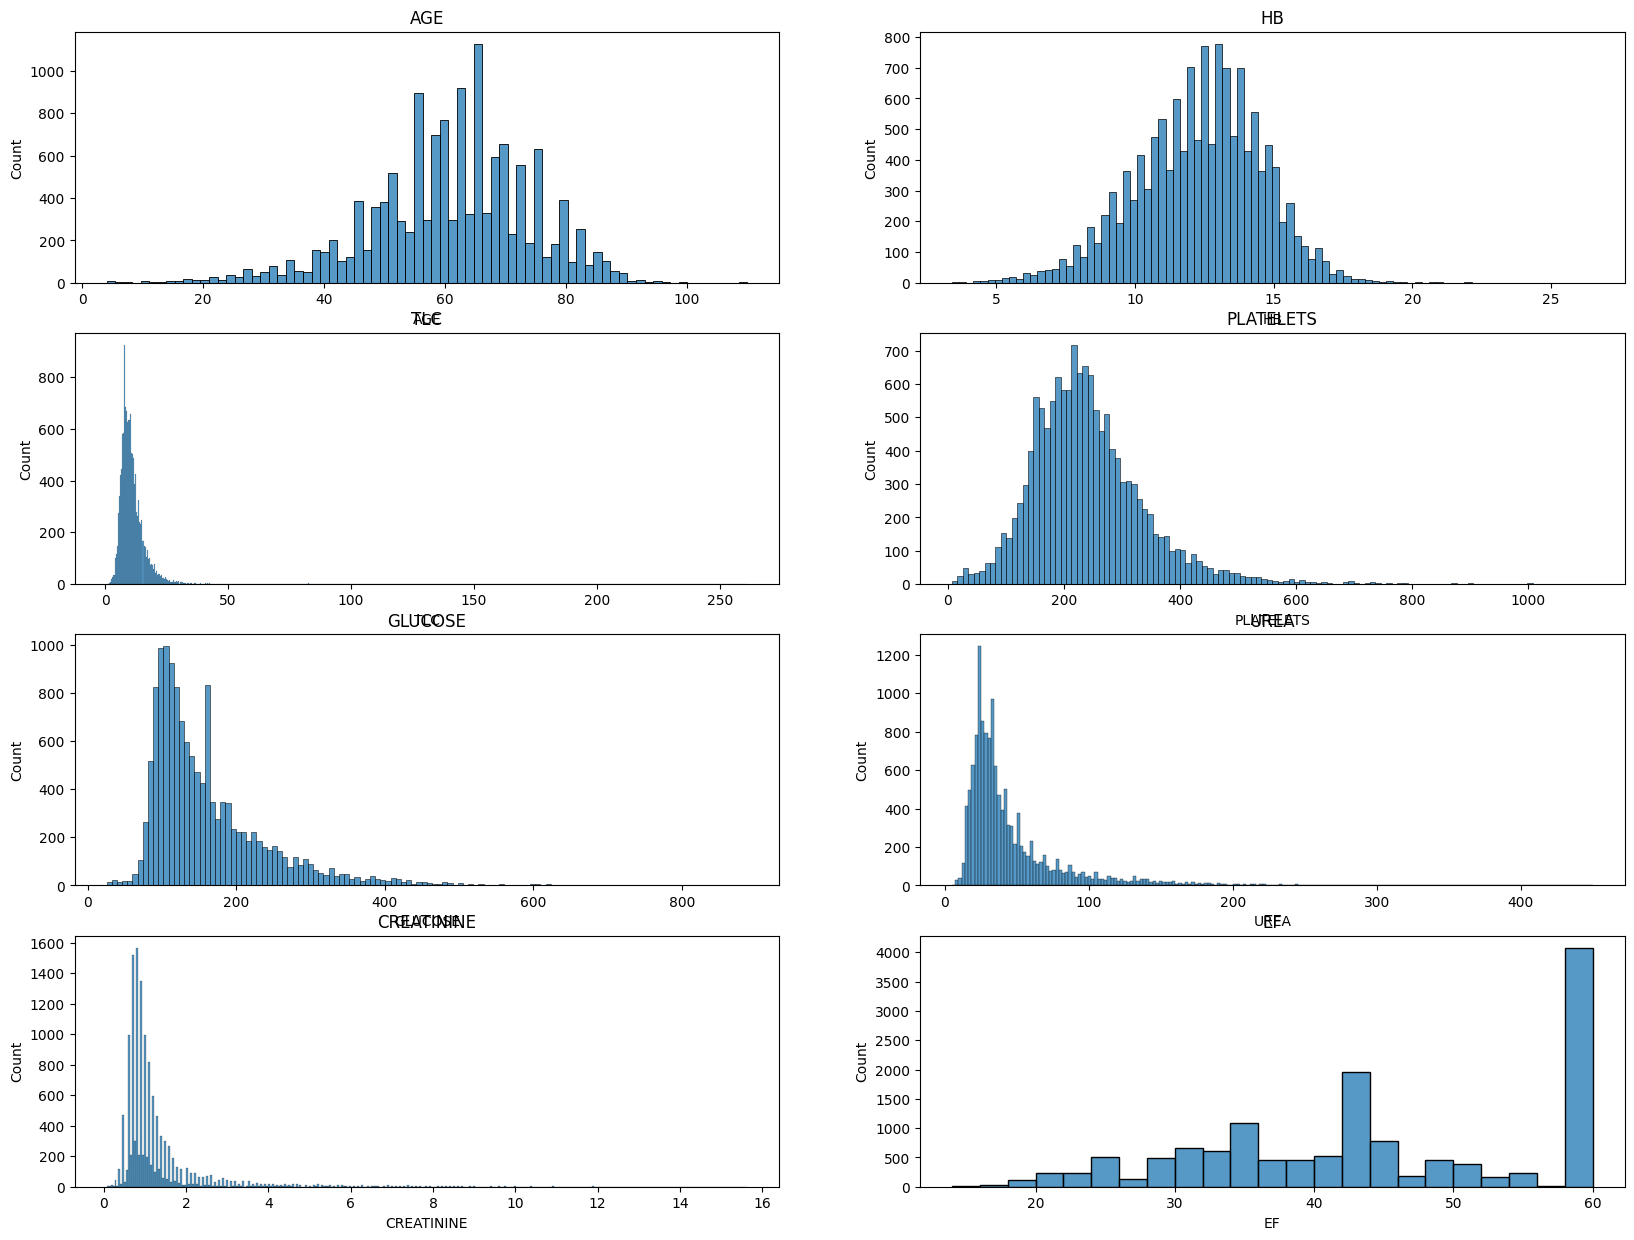

In [14]:

fig, axs = plt.subplots(4, 2, figsize=(20, 15))

num_feat = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

axs = axs.flatten()

for ax, f in zip(axs, num_feat):
    ax.set_title(f"{f}")
    sns.histplot(data=df[f], ax=ax)

In [15]:
numericals = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

print(df[numericals].isnull().sum())

AGE           0
HB            0
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
EF            0
dtype: int64


In [16]:
rob = RobustScaler()
numericals = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']
df_numerical = df[numericals]
df_numerical = rob.fit_transform(df_numerical)
df_numerical = pd.DataFrame(data=df_numerical, columns=['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF'])

df[numericals] = df_numerical.reset_index(drop=True)

df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17


In [17]:
df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15752,NaN,F,U,O,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15754,NaN,M,U,E,10,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15755,NaN,F,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01


In [18]:
df[df['AGE'].isna()]

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
13755,NaN,M,U,O,3,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13756,NaN,F,U,O,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13757,NaN,F,U,O,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13758,NaN,M,U,E,16,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13759,NaN,M,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15752,NaN,F,U,O,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15754,NaN,M,U,E,10,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15755,NaN,F,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5


## Non numerical features

In [19]:
df_non_numerical = df.select_dtypes(exclude=['number'])

enc_binary = OneHotEncoder(drop='if_binary', sparse_output=False)
enc_binary.fit(df_non_numerical)

df_non_numerical[enc_binary.get_feature_names_out()] = enc_binary.transform(df_non_numerical)

df_non_numerical_cols = df_non_numerical.iloc[:, :3].columns

df_non_numerical = df_non_numerical.iloc[:, 3:]

df_non_numerical.columns = df_non_numerical_cols

df_non_numerical

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
15751,0.0,1.0,0.0
15752,0.0,1.0,1.0
15754,1.0,1.0,0.0
15755,0.0,1.0,1.0


In [20]:
df_numerical_reset = df_numerical.reset_index(drop=True)
df_non_numerical_reset = df_non_numerical.reset_index(drop=True)
df_sin_cos = df[['sin_admission', 'cos_admission']].reset_index(drop=True)

treated_cols = list(df_numerical_reset.columns) + list(df_non_numerical_reset.columns) + list(df_sin_cos.columns)

df_other_cols = df.drop(columns=treated_cols)
df_other_cols_reset = df_other_cols.reset_index(drop=True)

df_processed = pd.concat([df_numerical_reset, df_non_numerical_reset, df_sin_cos, df_other_cols_reset], axis=1)
df_processed

,AGE,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF,GENDER,RURAL,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1.117647,-0.967742,1.24,0.964602,-0.678571,0.000000,-0.017241,-0.33845,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.176471,0.387097,-0.18,-0.699115,-0.297619,-0.592593,-0.017241,-0.05845,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.529412,-0.612903,0.96,0.893805,0.595238,2.185185,2.396552,0.00000,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.294118,0.096774,0.00,0.513274,-0.083333,-0.259259,-0.534483,-0.05845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.117647,0.354839,-0.16,-1.787611,0.083333,0.777778,0.586207,-1.09845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,-0.117647,-1.419355,3.02,-1.460177,1.011905,-0.592593,-0.706897,-0.21845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13751,1.411765,-1.193548,0.76,1.176991,-0.071429,0.851852,0.844828,-0.21845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13752,1.176471,-1.032258,0.36,1.274336,0.869048,1.222222,1.706897,-0.45845,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13753,-0.176471,0.193548,0.52,1.796460,0.190476,-0.185185,-0.189655,0.66155,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_processed.columns


Index(['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF',
       'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'sin_admission',
       'cos_admission', 'DURATION OF STAY', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA',
       'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN',
       'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI',
       'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION'],
      dtype='object')

# Train test split

In [22]:
X = df_processed.drop(columns='DURATION OF STAY')
y = df_processed['DURATION OF STAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11004, 49)
(2751, 49)
(11004,)
(2751,)


# Pipelines

## Function transformer for [ Month Year ] Column

In [23]:
# def month_preprocessor(df):

#     month_dict = {
#         'Jan':1,
#         'Feb':2,
#         'Mar':3,
#         'Apr':4,
#         'May':5,
#         'Jun':6,
#         'Jul':7,
#         'Aug':8,
#         'Sep':9,
#         'Oct':10,
#         'Nov':11,
#         'Dec':12
#     }

#     df['month_nb'] = df['month year'].apply(lambda x: month_dict[x[:3]])

#     months_in_a_year = 12

#     df['sin_admission'] = np.sin(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)
#     df['cos_admission'] = np.cos(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)

#     df.drop(columns=['month year', 'month_nb'], inplace=True)

#     return df

In [24]:
# standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler()
# robust_scaler = RobustScaler()
# imputer = SimpleImputer()

# # Parallelize "num_transformer"
# num_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy="mean")),
#     ('standard_scaler', StandardScaler())
# ])

# # Encode categorical values
# cat_transformer = OneHotEncoder(handle_unknown='ignore')

# # Parallelize "num_transformer" and "cat_transfomer"
# preprocessor = ColumnTransformer([
#     ('num_transformer', num_transformer, ['age', 'bmi']),
#     ('cat_transformer', cat_transformer, ['smoker', 'region'])
# ])


In [25]:
#  # Visualizing Pipelines in HTML
# set_config(display='diagram')

# preprocessor

# Baseline

In [26]:
from sklearn.metrics import mean_absolute_error

y_mean = df['DURATION OF STAY'].mean()

y_pred = [y_mean] * len(df['DURATION OF STAY'])

mae = mean_absolute_error(df['DURATION OF STAY'], y_pred)

print('MAE =', round(mae, 2))

MAE = 3.24


MAE for Baseline Model = 3.24

# Grid Search for random forest


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Random Forest Score:", grid_search_rf.best_score_)

KeyboardInterrupt: 

# Random Forest with best params

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer


model = RandomForestRegressor(n_estimators = 200, max_depth = 30, n_jobs = -1,min_samples_leaf = 1,min_samples_split = 2)

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=5
)

print(f"MAE: {-cv_results['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {-cv_results['test_neg_mean_squared_error'].mean()}")
print(f"R²: {cv_results['test_r2'].mean()}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

MAE: 2.5540990517415674
MSE: 15.511707754305093
R²: 0.2836727577672087
Mean Absolute Error (MAE): 2.6082780789462774
Mean Squared Error (MSE): 20.321204570623166
R² Score: 0.2554221835619581


MAE for RandomForest Model = 2.55

# GridSearch for Ridge

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}


grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


print("Best Negative MAE:", grid_search.best_score_)


y_pred = grid_search.best_estimator_.predict(X_test)


mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (Test):", mae_test)

Best Parameters: {'alpha': 10.0, 'solver': 'auto'}
Best Negative MAE: -2.705739408686226
MAE (Test): 2.8247412519259187


# Ridge with best params

In [36]:
model = Ridge(alpha= 10.0, solver= 'auto')

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=5
)

print(f"MAE: {-cv_results['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {-cv_results['test_neg_mean_squared_error'].mean()}")
print(f"R²: {cv_results['test_r2'].mean()}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

MAE: 2.705739408686226
MSE: 17.19327621487322
R²: 0.20626604592952447
Mean Absolute Error (MAE): 2.8247412519259187
Mean Squared Error (MSE): 22.4505879776087
R² Score: 0.17740064492616725


MAE for Ridge Model = 2.70

# GridSearch for KNN Model

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Negative MAE:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (Test):", mae_test)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Negative MAE: -2.4824213512141475
MAE (Test): 2.540990310272843


# KNN Model with best params

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model = KNeighborsRegressor(metric= 'manhattan', n_neighbors= 11, weights= 'distance')

scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=5
)

print(f"MAE: {-cv_results['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {-cv_results['test_neg_mean_squared_error'].mean()}")
print(f"R²: {cv_results['test_r2'].mean()}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

MAE: 2.4824213512141475
MSE: 16.264521533198472
R²: 0.2485003755970067
Mean Absolute Error (MAE): 2.540990310272843
Mean Squared Error (MSE): 21.65065500024745
R² Score: 0.20671053881117096


MAE for KNN Model = 2.48

# GridSearch for ElasticNet

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_en = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0],
    'max_iter': [1000, 5000, 10000]
}

en_model = ElasticNet(random_state=42)

grid_search_en = GridSearchCV(
    estimator=en_model,
    param_grid=param_grid_en,
    cv=5,
    n_jobs=-1,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    refit='r2'
)

grid_search_en.fit(X_train, y_train)

print("Best Parameters for ElasticNet:", grid_search_en.best_params_)
print("Best R² Score:", grid_search_en.best_score_)

Best Parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Best R² Score: 0.17129659152468388


# ElasticNet with best params

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=1000, random_state=42)

scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    scoring=scoring,
    cv=5
)

print(f"MAE: {-cv_results['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {-cv_results['test_neg_mean_squared_error'].mean()}")
print(f"R²: {cv_results['test_r2'].mean()}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

MAE: 2.798534063003939
MSE: 17.945406358699405
R²: 0.17129659152468388
Mean Absolute Error (MAE): 2.9024722236979166
Mean Squared Error (MSE): 23.241523523571466
R² Score: 0.14842042085974871


MAE for ElasticNet Model = 2.80

# Deep learning Models

## CNN Model

In [41]:
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(49,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(20, activation='relu', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.005, l2=0.0005)))
model.add(layers.Dense(1, activation='linear'))

# Compile the model with a tuned learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

# Define callbacks
es = EarlyStopping(patience=50, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=1000, validation_split=0.3, callbacks=[es, lr_scheduler])

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

2024-10-20 10:07:56.356898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 10:08:04.730202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
121/121 [==============================] - 3s 12ms/step - loss: 62.0496 - mae: 5.9824 - val_loss: 60.7266 - val_mae: 5.9874 - lr: 1.0000e-04
Epoch 2/1000
121/121 [==============================] - 1s 7ms/step - loss: 53.7897 - mae: 5.3559 - val_loss: 52.9386 - val_mae: 5.3804 - lr: 1.0000e-04
Epoch 3/1000
121/121 [==============================] - 1s 6ms/step - loss: 45.8868 - mae: 4.6982 - val_loss: 44.9105 - val_mae: 4.6412 - lr: 1.0000e-04
Epoch 4/1000
121/121 [==============================] - 1s 6ms/step - loss: 39.3453 - mae: 4.0839 - val_loss: 38.1594 - val_mae: 3.9538 - lr: 1.0000e-04
Epoch 5/1000
121/121 [==============================] - 1s 6ms/step - loss: 33.6678 - mae: 3.5733 - val_loss: 33.0269 - val_mae: 3.4355 - lr: 1.0000e-04
Epoch 6/1000
121/121 [==============================] - 1s 5ms/step - loss: 30.2427 - mae: 3.2897 - val_loss: 29.2413 - val_mae: 3.1163 - lr: 1.0000e-04
Epoch 7/1000
121/121 [==============================] - 1s 5ms/step - loss: 27.24

[25.144756317138672, 2.814828872680664]

MAE for CNN Model = 2.73

## MLP Model 

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


input_shape = (X_train.shape[1],)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=input_shape))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae', metrics=['mae'])


model.compile(optimizer='RMSprop', loss='mae', metrics=['mae'])


early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    validation_data=(X_train, y_train),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])


loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae:.4f}')


Epoch 1/100
344/344 [==============================] - 4s 8ms/step - loss: 2.9497 - mae: 2.9497 - val_loss: 2.6610 - val_mae: 2.6610
Epoch 2/100
344/344 [==============================] - 3s 8ms/step - loss: 2.7778 - mae: 2.7778 - val_loss: 2.6564 - val_mae: 2.6564
Epoch 3/100
344/344 [==============================] - 3s 10ms/step - loss: 2.7357 - mae: 2.7357 - val_loss: 2.5727 - val_mae: 2.5727
Epoch 4/100
344/344 [==============================] - 2s 6ms/step - loss: 2.6937 - mae: 2.6937 - val_loss: 2.5876 - val_mae: 2.5876
Epoch 5/100
344/344 [==============================] - 2s 6ms/step - loss: 2.6807 - mae: 2.6807 - val_loss: 2.5276 - val_mae: 2.5276
Epoch 6/100
344/344 [==============================] - 2s 6ms/step - loss: 2.6671 - mae: 2.6671 - val_loss: 2.5266 - val_mae: 2.5266
Epoch 7/100
344/344 [==============================] - 2s 5ms/step - loss: 2.6586 - mae: 2.6586 - val_loss: 2.5191 - val_mae: 2.5191
Epoch 8/100
344/344 [==============================] - 2s 6ms/step -

MAE for MLP Model = 2.74